Create a database new for training

In [1]:
import json
import os


import pandas as pd
from pathlib import Path

# Load raw and processed files
raw_path = Path("data/raw/sql-llama-instruct-v0.5.jsonl")
processed_path = Path("data/processed/sql-llama-instruct-v0.5.jsonl")

def load_jsonl(path):
    with open(path, 'r', encoding='utf-8') as f:
        return [json.loads(line) for line in f]

processed_data = load_jsonl(processed_path)

# Turn processed data into a DataFrame
df = pd.DataFrame(processed_data)
df.head()

,idx,messages,source,target,test_input_ids,input_ids,label
0,2,"[{'role': 'system', 'content': ''}, {'role': '...",### Input:\nAs an experienced and professional...,"\n```json\n{\n ""lists"": ""drop_all"",\n ""movie...","[1, 835, 10567, 29901, 13, 2887, 385, 18860, 3...","[1, 835, 10567, 29901, 13, 2887, 385, 18860, 3...","[-100, -100, -100, -100, -100, -100, -100, -10..."
1,3,"[{'role': 'system', 'content': ''}, {'role': '...",### Input:\nGiven a 【Database schema】 descript...,\nSub question 1: What is the most popular mov...,"[1, 835, 10567, 29901, 13, 29954, 5428, 263, 2...","[1, 835, 10567, 29901, 13, 29954, 5428, 263, 2...","[-100, -100, -100, -100, -100, -100, -100, -10..."
2,8,"[{'role': 'system', 'content': ''}, {'role': '...",### Input:\nAs an experienced and professional...,"\n```json\n{\n ""lists"": ""drop_all"",\n ""movie...","[1, 835, 10567, 29901, 13, 2887, 385, 18860, 3...","[1, 835, 10567, 29901, 13, 2887, 385, 18860, 3...","[-100, -100, -100, -100, -100, -100, -100, -10..."
3,9,"[{'role': 'system', 'content': ''}, {'role': '...",### Input:\nGiven a 【Database schema】 descript...,\nSub question 1: Retrieve the popularity for ...,"[1, 835, 10567, 29901, 13, 29954, 5428, 263, 2...","[1, 835, 10567, 29901, 13, 29954, 5428, 263, 2...","[-100, -100, -100, -100, -100, -100, -100, -10..."
4,10,"[{'role': 'system', 'content': ''}, {'role': '...",### Input:\nAs an experienced and professional...,"\n```json\n{\n ""lists"": ""drop_all"",\n ""movie...","[1, 835, 10567, 29901, 13, 2887, 385, 18860, 3...","[1, 835, 10567, 29901, 13, 2887, 385, 18860, 3...","[-100, -100, -100, -100, -100, -100, -100, -10..."


Adding the type of task 

In [ ]:
def classify_type(source):
    after_input = source.split('### Input:')[-1].lstrip()
    if after_input.startswith('As '):
        return 'Selector'
    elif after_input.startswith('Given'):
        return 'Decomposer'
    else:
        return 'Refiner'

df['type'] = df['source'].apply(classify_type)
df.head()

,idx,messages,source,target,test_input_ids,input_ids,label,type
0,2,"[{'role': 'system', 'content': ''}, {'role': '...",### Input:\nAs an experienced and professional...,"\n```json\n{\n ""lists"": ""drop_all"",\n ""movie...","[1, 835, 10567, 29901, 13, 2887, 385, 18860, 3...","[1, 835, 10567, 29901, 13, 2887, 385, 18860, 3...","[-100, -100, -100, -100, -100, -100, -100, -10...",Selector
1,3,"[{'role': 'system', 'content': ''}, {'role': '...",### Input:\nGiven a 【Database schema】 descript...,\nSub question 1: What is the most popular mov...,"[1, 835, 10567, 29901, 13, 29954, 5428, 263, 2...","[1, 835, 10567, 29901, 13, 29954, 5428, 263, 2...","[-100, -100, -100, -100, -100, -100, -100, -10...",Decomposer
2,8,"[{'role': 'system', 'content': ''}, {'role': '...",### Input:\nAs an experienced and professional...,"\n```json\n{\n ""lists"": ""drop_all"",\n ""movie...","[1, 835, 10567, 29901, 13, 2887, 385, 18860, 3...","[1, 835, 10567, 29901, 13, 2887, 385, 18860, 3...","[-100, -100, -100, -100, -100, -100, -100, -10...",Selector
3,9,"[{'role': 'system', 'content': ''}, {'role': '...",### Input:\nGiven a 【Database schema】 descript...,\nSub question 1: Retrieve the popularity for ...,"[1, 835, 10567, 29901, 13, 29954, 5428, 263, 2...","[1, 835, 10567, 29901, 13, 29954, 5428, 263, 2...","[-100, -100, -100, -100, -100, -100, -100, -10...",Decomposer
4,10,"[{'role': 'system', 'content': ''}, {'role': '...",### Input:\nAs an experienced and professional...,"\n```json\n{\n ""lists"": ""drop_all"",\n ""movie...","[1, 835, 10567, 29901, 13, 2887, 385, 18860, 3...","[1, 835, 10567, 29901, 13, 2887, 385, 18860, 3...","[-100, -100, -100, -100, -100, -100, -100, -10...",Selector


Save Locally 

In [3]:
'''
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

model_name = "cssupport/t5-small-awesome-text-to-sql"
save_path = "D:/t5-sql-model"  # change if you want another path

# Download and cache locally
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Save locally
tokenizer.save_pretrained(save_path)
model.save_pretrained(save_path)
'''

'\nfrom transformers import AutoTokenizer, AutoModelForSeq2SeqLM\n\nmodel_name = "cssupport/t5-small-awesome-text-to-sql"\nsave_path = "D:/t5-sql-model"  # change if you want another path\n\n# Download and cache locally\ntokenizer = AutoTokenizer.from_pretrained(model_name)\nmodel = AutoModelForSeq2SeqLM.from_pretrained(model_name)\n\n# Save locally\ntokenizer.save_pretrained(save_path)\nmodel.save_pretrained(save_path)\n'

Set seeds for reproductivity

In [2]:
import random
import numpy as np
import torch
# ✅ 1. LIBRARIES & DATASET SETUP
import json
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, Trainer, TrainingArguments, DataCollatorForSeq2Seq
from datasets import Dataset 
import evaluate
import matplotlib.pyplot as plt
from trl import SFTTrainer, SFTConfig
import os
# ✅ CLASS: SQLDataset (usando `self.df` para evitar conflictos con atributos reservados)
from torch.utils.data import Dataset
import os
import json
import matplotlib.pyplot as plt
from transformers import Trainer
#from datasets import load_metric
# ✅ 2. TOKENIZER & MODEL SETUP
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

def all_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)  # For single-GPU setups
    torch.cuda.manual_seed_all(seed)  # For multi-GPU setups

    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False  # For reproducibility, set to False

all_seed(42)

c:\Users\nil\Desktop\TFGv2\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


ModuleNotFoundError: No module named 'datasets'

Load model and tokenizer

In [21]:


model = AutoModelForSeq2SeqLM.from_pretrained("./t5-sql-model")
tokenizer = AutoTokenizer.from_pretrained("./t5-sql-model")

In [22]:

df = df.reset_index(drop=True)
df.head()

,idx,messages,source,target,test_input_ids,input_ids,label,type
0,2,"[{'role': 'system', 'content': ''}, {'role': '...",### Input:\nAs an experienced and professional...,"\n```json\n{\n ""lists"": ""drop_all"",\n ""movie...","[1, 835, 10567, 29901, 13, 2887, 385, 18860, 3...","[1, 835, 10567, 29901, 13, 2887, 385, 18860, 3...","[-100, -100, -100, -100, -100, -100, -100, -10...",Selector
1,3,"[{'role': 'system', 'content': ''}, {'role': '...",### Input:\nGiven a 【Database schema】 descript...,\nSub question 1: What is the most popular mov...,"[1, 835, 10567, 29901, 13, 29954, 5428, 263, 2...","[1, 835, 10567, 29901, 13, 29954, 5428, 263, 2...","[-100, -100, -100, -100, -100, -100, -100, -10...",Decomposer
2,8,"[{'role': 'system', 'content': ''}, {'role': '...",### Input:\nAs an experienced and professional...,"\n```json\n{\n ""lists"": ""drop_all"",\n ""movie...","[1, 835, 10567, 29901, 13, 2887, 385, 18860, 3...","[1, 835, 10567, 29901, 13, 2887, 385, 18860, 3...","[-100, -100, -100, -100, -100, -100, -100, -10...",Selector
3,9,"[{'role': 'system', 'content': ''}, {'role': '...",### Input:\nGiven a 【Database schema】 descript...,\nSub question 1: Retrieve the popularity for ...,"[1, 835, 10567, 29901, 13, 29954, 5428, 263, 2...","[1, 835, 10567, 29901, 13, 29954, 5428, 263, 2...","[-100, -100, -100, -100, -100, -100, -100, -10...",Decomposer
4,10,"[{'role': 'system', 'content': ''}, {'role': '...",### Input:\nAs an experienced and professional...,"\n```json\n{\n ""lists"": ""drop_all"",\n ""movie...","[1, 835, 10567, 29901, 13, 2887, 385, 18860, 3...","[1, 835, 10567, 29901, 13, 2887, 385, 18860, 3...","[-100, -100, -100, -100, -100, -100, -100, -10...",Selector


Need to use a different tokenizer as we had before a Llama tokenizer and now a T5 having own vocabulary and tokenization rules. If the input_ids were generated with a different tokenizer, the model won’t understand them properly.

In [23]:

class SQLDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length=512):
        self.tokenizer = tokenizer
        self.df = dataframe.reset_index(drop=True)  
        self.max_length = max_length

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]
        input_text = row['source']
        target_text = row['target']

        encoding = self.tokenizer(
            input_text,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )
        target_encoding = self.tokenizer(
            target_text,
            max_length=self.max_length,
            padding="max_length",
            truncation=True,
            return_tensors="pt"
        )

        return {
            "input_ids": encoding["input_ids"].squeeze(),
            "attention_mask": encoding["attention_mask"].squeeze(),
            "labels": target_encoding["input_ids"].squeeze(),
            "type": row['type']
        }


    
data_collator = DataCollatorForSeq2Seq(tokenizer, model=model)

Plot

In [24]:


def plot_loss_curves_epochs_raw(train_state_path):
    if not os.path.exists(train_state_path):
        print(f"❌ File not found: {train_state_path}")
        return

    with open(train_state_path, "r") as f:
        trainer_state = json.load(f)

    logs = trainer_state.get("log_history", [])

    # Extract epoch and loss for all training points (no average, just raw)
    train_epochs = [entry["epoch"] for entry in logs if "loss" in entry and "epoch" in entry]
    train_losses = [entry["loss"] for entry in logs if "loss" in entry and "epoch" in entry]

    # Extract eval loss per epoch (should be one per epoch)
    eval_epochs = [entry["epoch"] for entry in logs if "eval_loss" in entry and "epoch" in entry]
    eval_losses = [entry["eval_loss"] for entry in logs if "eval_loss" in entry and "epoch" in entry]

    plt.figure(figsize=(12, 6))
    plt.plot(train_epochs, train_losses, label="Train Loss (per batch, no average)", marker='o', linestyle='-')
    plt.plot(eval_epochs, eval_losses, label="Eval Loss (per epoch)", marker='s', linestyle='--')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Training and Evaluation Loss Curves (Training loss per batch, Eval loss per epoch)")
    plt.legend()
    plt.grid(True)
    plt.show()



Metrics

In [9]:

import sqlite3


def execute_sql(sql_query, db_path):
    """
    Executes the given SQL query on the specified SQLite database and returns the result.
    """
    try:
        conn = sqlite3.connect(db_path)
        cursor = conn.cursor()
        cursor.execute(sql_query)
        result = cursor.fetchall()
        conn.close()
        return result
    except sqlite3.Error as e:
        print(f"Error executing SQL query: {e}")
        return None

# Result equality comparison function
def result_eq(result1, result2):
    """
    Compares two SQL query results for equality.
    """
    return result1 == result2

# Execution accuracy computation function
def compute_exec_accuracy(preds, labels, db_path):
    correct = 0
    for pred, label in zip(preds, labels):
        try:
            pred_result = execute_sql(pred, db_path)
            label_result = execute_sql(label, db_path)
            if pred_result is not None and label_result is not None and result_eq(pred_result, label_result):
                correct += 1
        except Exception as e:
            continue
    return correct / len(preds) if preds else 0

In [25]:
# CHECK IF PATH EXISTS /home/elsar/.cache/huggingface/modules/evaluate_modules/metrics
import os
if not os.path.exists(".cache/huggingface/modules/evaluate_modules/metrics/evaluate-metric--rouge/b01e0accf3bd6dd24839b769a5fda24e14995071570870922c71970b3a6ed886"):
    print("❌ The path /home/elsar/.cache/huggingface/modules/evaluate_modules/metrics/rouge does not exist.")
print("exists")
cache_dir = ".cache/huggingface/modules/evaluate_modules/"
try:
    rouge_metric = evaluate.load(".cache/huggingface/modules/evaluate_modules/metrics/evaluate-metric--rouge/b01e0accf3bd6dd24839b769a5fda24e14995071570870922c71970b3a6ed886/rouge.py")
    print("Rouge metric loaded successfully!")
except Exception as e:
    print("Error loading rouge metric:", e)


exists
Rouge metric loaded successfully!


Examples

In [11]:
# Example predictions and labels (predicted and reference SQL queries)
preds = [
    tokenizer.encode("SELECT name FROM students WHERE age > 20", return_tensors="pt")[0],
    tokenizer.encode("SELECT id, name FROM teachers", return_tensors="pt")[0]
]
labels = [
    tokenizer.encode("SELECT name FROM students WHERE age > 20", return_tensors="pt")[0],
    tokenizer.encode("SELECT id, name FROM teachers", return_tensors="pt")[0]
]

# Function to compute ROUGE-L and print the result
def compute_metrics(eval_preds):
    preds, labels = eval_preds
    
    # Decode predictions and labels
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Compute ROUGE-L score
    result = rouge_metric.compute(predictions=decoded_preds, references=decoded_labels)
    
    # Extract ROUGE-L F1 score (now it's just a float value)
    rouge_l_score = result["rougeL"]

    return {"rouge_l": rouge_l_score}

# Compute the metrics for the example data
metrics = compute_metrics((preds, labels))

# Print the ROUGE-L F1 score
print(f"ROUGE-L F1 score: {metrics['rouge_l']}")

ROUGE-L F1 score: 1.0


In [12]:
# These are just examples of token IDs; in practice, you will get these from the model's output
preds = [
    tokenizer.encode("SELECT name FROM students WHERE age > 20", return_tensors="pt")[0].tolist(),
    tokenizer.encode("SELECT id, name FROM teachers", return_tensors="pt")[0].tolist()
]
labels = [
    tokenizer.encode("SELECT name FROM students WHERE age > 20", return_tensors="pt")[0].tolist(),
    tokenizer.encode("SELECT id, name FROM teachers", return_tensors="pt")[0].tolist()
]

# Function to compute ROUGE-L and print the result
def compute_metrics(eval_preds):
    preds, labels = eval_preds
    
    # Decode predictions and labels (token IDs should be passed as lists of lists)
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)

    # Compute ROUGE-L score
    result = rouge_metric.compute(predictions=decoded_preds, references=decoded_labels)
    
    # Extract ROUGE-L F1 score
    rouge_l_score = result["rougeL"]

    return {"rouge_l": rouge_l_score}

# Compute the metrics for the example data
metrics = compute_metrics((preds, labels))

# Print the ROUGE-L F1 score
print(f"ROUGE-L F1 score: {metrics['rouge_l']}")

ROUGE-L F1 score: 1.0


In [13]:
def compute_metrics(eval_preds):
    preds, labels = eval_preds

    # Debugging: check types and shapes of preds and labels
    print(f"Preds: {preds}")
    print(f"Labels: {labels}")
    
    # If preds are logits, convert them to token ids (take argmax to get token ids)
    if isinstance(preds, tuple):  # preds are likely logits
        preds = preds[0]  # Extract logits from the tuple

    # Convert to numpy if preds is a tensor
    if isinstance(preds, torch.Tensor):
        preds = preds.argmax(dim=-1).cpu().numpy()  # Take argmax to get token ids

    # Ensure preds and labels are lists of token IDs
    if isinstance(preds, np.ndarray):
        preds = preds.tolist()  # Convert numpy array to list of lists if necessary
    
    if isinstance(labels, np.ndarray):
        labels = labels.tolist()  # Convert numpy array to list of lists if necessary

    # Debugging: check the shape and content of preds and labels
    print(f"Preds (after conversion to list): {preds}")
    print(f"Labels (after conversion to list): {labels}")

    # Decode predictions and labels (token IDs should be passed as lists of lists)
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
    print(f"Decoded Predictions: {decoded_preds}")

    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    print(f"Decoded Labels: {decoded_labels}")

    # Compute ROUGE-L score
    result = rouge_metric.compute(predictions=decoded_preds, references=decoded_labels)["rougeL"]
    print(f"ROUGE-L Result: {result}")
    
    return {"rouge_l": result}


# Simulate the tokenization of predictions and labels
input_texts = [
    "SELECT name FROM students WHERE age > 20",
    "SELECT id, name FROM teachers"
]
target_texts = [
    "SELECT name FROM students WHERE age > 20",
    "SELECT id, name FROM teachers"
]

# Tokenize the texts (simulating the `input_ids` and `labels` as tokens)
preds = [
    tokenizer.encode(text, return_tensors="pt")[0] for text in input_texts
]
labels = [
    tokenizer.encode(text, return_tensors="pt")[0] for text in target_texts
]

# Run the metrics computation
metrics = compute_metrics((preds, labels))
print(f"Final ROUGE-L: {metrics}")





Preds: [tensor([    3, 23143, 14196,   564, 21680,   481,   549, 17444,   427,  1246,
         2490,   460,     1]), tensor([    3, 23143, 14196,     3,    23,    26,     6,   564, 21680,  3081,
            1])]
Labels: [tensor([    3, 23143, 14196,   564, 21680,   481,   549, 17444,   427,  1246,
         2490,   460,     1]), tensor([    3, 23143, 14196,     3,    23,    26,     6,   564, 21680,  3081,
            1])]
Preds (after conversion to list): [tensor([    3, 23143, 14196,   564, 21680,   481,   549, 17444,   427,  1246,
         2490,   460,     1]), tensor([    3, 23143, 14196,     3,    23,    26,     6,   564, 21680,  3081,
            1])]
Labels (after conversion to list): [tensor([    3, 23143, 14196,   564, 21680,   481,   549, 17444,   427,  1246,
         2490,   460,     1]), tensor([    3, 23143, 14196,     3,    23,    26,     6,   564, 21680,  3081,
            1])]
Decoded Predictions: ['SELECT name FROM students WHERE age > 20', 'SELECT id, name FROM teachers

Auxiliary function to plot per type 

In [26]:
from transformers import TrainerCallback
class LossLoggerCallback(TrainerCallback):
    def __init__(self, train_dataset):
        self.records = []
        self.train_dataset = train_dataset

    def on_step_end(self, args, state, control, **kwargs):
        # Get the loss from state.log_history if available
        if state.log_history and 'loss' in state.log_history[-1]:
            loss = state.log_history[-1]['loss']
            step = state.global_step
            # Map step to sample index assuming batch_size=1 and no shuffle
            sample_idx = step - 1  # adjust if needed
            
            # Only record if sample_idx is valid (inside dataset)
            if 0 <= sample_idx < len(self.train_dataset):
                sample_type = self.train_dataset.df.iloc[sample_idx]['type']
                self.records.append({'step': step, 'loss': loss, 'type': sample_type})
            else:
                # Ignore out-of-bound samples, do not append 'unknown'
                pass


FineTune

In [11]:

def run_exp_1(train_df, val_df, model, tokenizer, experiment_name="exp"):

    config = TrainingArguments(
        output_dir=f"./results/{experiment_name}",
        overwrite_output_dir=True,
        num_train_epochs=10,
        per_device_train_batch_size=1,
        per_device_eval_batch_size=1,
        logging_dir=f"./logs/{experiment_name}",
        eval_strategy="epoch",
        save_strategy="epoch",
        save_total_limit=1,  # Only keep the best one
        load_best_model_at_end=True,
        metric_for_best_model="eval_loss",
        greater_is_better=False,
        logging_steps=50,
        learning_rate=5e-5,
        report_to="none",
        bf16=True
    )

    print(f"🔬 Running experiment: {experiment_name}")
    
    # Evita sobrescribir variables como `val_df`
    train_dataset = SQLDataset(train_df, tokenizer)
    val_dataset = SQLDataset(val_df, tokenizer)

    # Then pass the callback to your Trainer:
    loss_logger = LossLoggerCallback(train_dataset)

    trainer = Trainer(
        model=model,
        args=config,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        tokenizer=tokenizer,
        data_collator=DataCollatorForSeq2Seq(tokenizer, model=model),
        compute_metrics= None,
        callbacks=[loss_logger]
    )
    #print("hello")
    #trainer.evaluate()
    print("Starting training...")
    trainer.train()
    trainer.save_model(f"./results/{experiment_name}")
    # After training, plot the loss curves from trainer_state.json
    checkpoints = [d for d in os.listdir(f"./results/{experiment_name}") if d.startswith("checkpoint-")]
    if checkpoints:
        # Extract numbers and find the max
        max_ckpt = max(checkpoints, key=lambda x: int(x.split("-")[1]))
        trainer_state_path = f"./results/{experiment_name}/{max_ckpt}/trainer_state.json"
    else:
        trainer_state_path = None
    if os.path.exists(trainer_state_path):
            plot_loss_curves_epochs_raw(trainer_state_path)
    else:
        print(f"⚠️ Could not find trainer_state.json at {trainer_state_path}, skipping plot.")
    df_losses = pd.DataFrame(loss_logger.records)
    for typ in df_losses['type'].unique():
        subset = df_losses[df_losses['type'] == typ]
        plt.plot(subset['step'], subset['loss'], label=f'Train Loss ({typ})')
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.title('Training Loss per Type')
    plt.legend()
    plt.show()
    

    return trainer



**Experiment 1: Baseline vs Balancing** 

Baseline: REAL DISTRIBUTION

/scratch/upftfg14/elsar/342465/ipykernel_4524/308241823.py:31: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


🔬 Running experiment: baseline
Starting training...


Epoch,Training Loss,Validation Loss
1,0.565600,0.485127
2,0.538100,0.448692
3,0.479700,0.424645
4,0.471500,0.408683
5,0.405000,0.396389
6,0.436800,0.387550
7,0.400500,0.381792
8,0.401500,0.378341
9,0.435400,0.374937
10,0.384100,0.374343


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


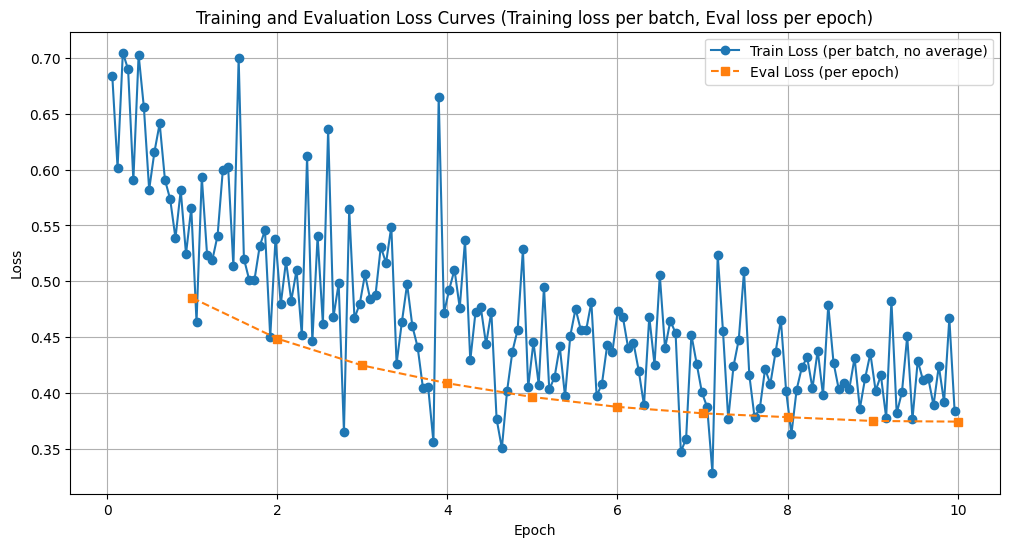

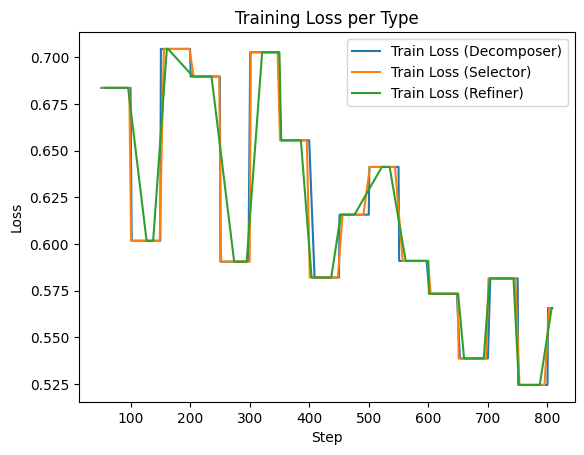

In [21]:
# ✅ BASELINE (random 1011 entries)
sampled_df = df.sample(n=1011).reset_index(drop=True)
train_df, val_df = train_test_split(sampled_df, test_size=0.2, stratify=sampled_df["type"])
trainer = run_exp_1(train_df, val_df, model, tokenizer, experiment_name="baseline")


In [27]:
def compute_metrics(eval_preds):
    decoded_preds, decoded_labels = eval_preds

    # Strip extra spaces
    decoded_preds = [pred.strip() for pred in decoded_preds]
    decoded_labels = [label.strip() for label in decoded_labels]

    # ROUGE-L
    rouge = rouge_metric.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True)

    # Exact Match
    exact_match = np.mean([pred == label for pred, label in zip(decoded_preds, decoded_labels)])

    return {
        "rougeL": rouge["rougeL"],
        "exact_match": exact_match
    }

In [28]:
import torch
from torch.utils.data import DataLoader
from tqdm import tqdm

def evaluate_model_on(df, model, tokenizer, compute_metrics, batch_size=1, max_length=128):

    model.eval()
    dataset = SQLDataset(df, tokenizer)
    dataloader = DataLoader(dataset, batch_size=batch_size)

    decoded_preds = []
    decoded_labels = []

    device = model.device

    for batch in tqdm(dataloader, desc="Generating predictions"):
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        with torch.no_grad():
            generated_ids = model.generate(
                input_ids=input_ids,
                attention_mask=attention_mask,
                max_length=max_length
            )

        # Decode and strip
        preds = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)
        refs = tokenizer.batch_decode(labels, skip_special_tokens=True)

        decoded_preds.extend([p.strip() for p in preds])
        decoded_labels.extend([r.strip() for r in refs])

    metrics = compute_metrics((decoded_preds, decoded_labels))
    print("📊 Manual Evaluation Metrics:", metrics)
    return metrics


In [28]:

# Evaluate on validation set
metrics_val = evaluate_model_on(val_df, trainer.model, tokenizer, compute_metrics)
metrics_val


Generating predictions: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 203/203 [01:59<00:00,  1.70it/s]


📊 Manual Evaluation Metrics: {'rougeL': np.float64(0.34485314837194114), 'exact_match': np.float64(0.0)}


{'rougeL': np.float64(0.34485314837194114), 'exact_match': np.float64(0.0)}

In [29]:
# Evaluate on training set
metrics_train = evaluate_model_on(train_df, trainer.model, tokenizer, compute_metrics)
metrics_train

Generating predictions: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 808/808 [07:52<00:00,  1.71it/s]


📊 Manual Evaluation Metrics: {'rougeL': np.float64(0.3541524325223271), 'exact_match': np.float64(0.0)}


{'rougeL': np.float64(0.3541524325223271), 'exact_match': np.float64(0.0)}

Balancing: UNDERSAMPLING 

/scratch/upftfg14/elsar/342465/ipykernel_4524/1479370950.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=337) if len(x) >= 337 else x)
/scratch/upftfg14/elsar/342465/ipykernel_4524/308241823.py:31: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


🔬 Running experiment: balanced
Starting training...


Epoch,Training Loss,Validation Loss
1,0.498400,0.367861
2,0.319400,0.353492
3,0.277000,0.341445
4,0.429600,0.331809
5,0.288100,0.326303
6,0.422600,0.321671
7,0.329600,0.318466
8,0.265200,0.316073
9,0.315600,0.314496
10,0.361300,0.313996


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


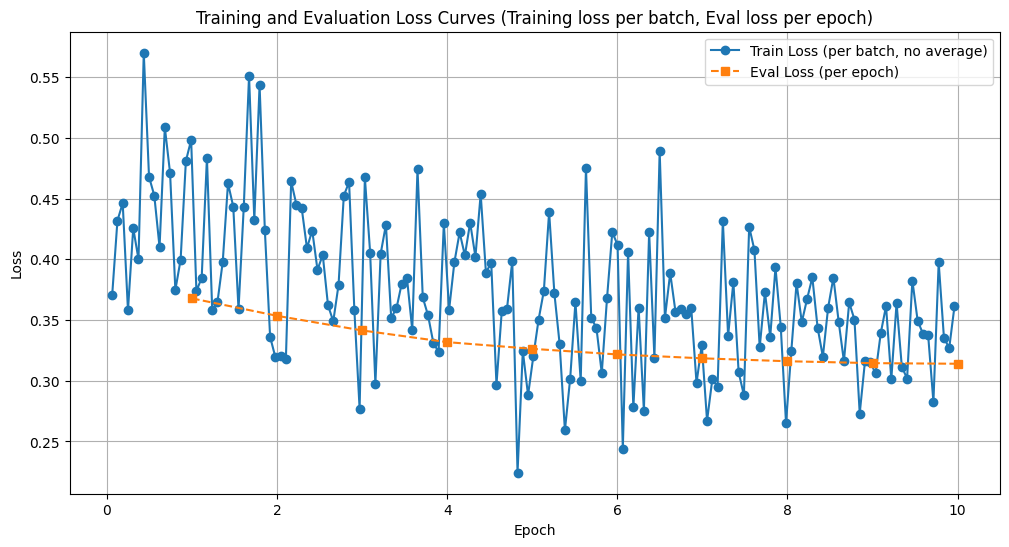

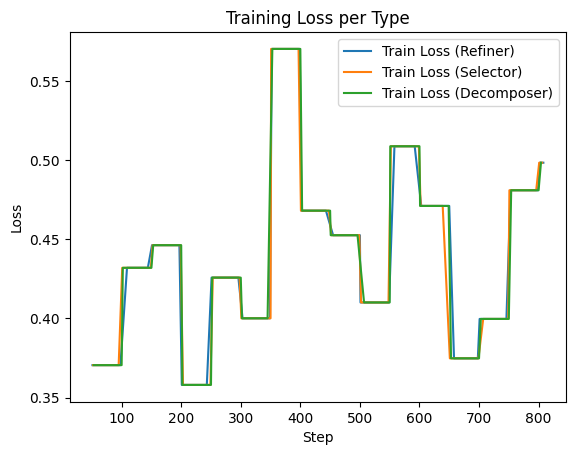

In [31]:
# ✅ BALANCED (337 per class)
balanced_df = (
    df.groupby("type")
    .apply(lambda x: x.sample(n=337) if len(x) >= 337 else x)
    .reset_index(drop=True)
)
train_df_balanced, val_df_balanced = train_test_split(balanced_df, test_size=0.2, stratify=balanced_df["type"])
trainer_2 = run_exp_1(train_df_balanced, val_df_balanced, model, tokenizer, experiment_name="balanced")

In [32]:
# Evaluate on validation set
metrics_val = evaluate_model_on(val_df, trainer_2.model, tokenizer, compute_metrics)
metrics_val

Generating predictions: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 203/203 [02:01<00:00,  1.68it/s]


📊 Manual Evaluation Metrics: {'rougeL': np.float64(0.19299333084864323), 'exact_match': np.float64(0.0)}


{'rougeL': np.float64(0.19299333084864323), 'exact_match': np.float64(0.0)}

In [33]:
# Evaluate on training set
metrics_train = evaluate_model_on(train_df, trainer_2.model, tokenizer, compute_metrics)
metrics_train

Generating predictions: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 808/808 [07:58<00:00,  1.69it/s]


📊 Manual Evaluation Metrics: {'rougeL': np.float64(0.2023505565565535), 'exact_match': np.float64(0.0)}


{'rougeL': np.float64(0.2023505565565535), 'exact_match': np.float64(0.0)}

**Experiment 2: Batch size vs memory, more epochs and adding early stopping**

Because training is noisy: batch liger kernel early stopping 

In [12]:
from transformers import EarlyStoppingCallback

def run_exp_2(train_df, val_df, model, tokenizer, experiment_name="exp", batch_size=4, learning_rate=5e-5):

    config = TrainingArguments(
    output_dir=f"./results/{experiment_name}",
    overwrite_output_dir=True,
    num_train_epochs=20,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    logging_dir=f"./logs/{experiment_name}",
    load_best_model_at_end=True,
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_steps=50,
    learning_rate=learning_rate,
    report_to="none",
    use_liger_kernel=True,  # Use Liger kernels for better performance     
    bf16=True, 
    greater_is_better=False,
    metric_for_best_model="eval_loss"
    )
    print(f"🔬 Running experiment: {experiment_name}")
    
    # Evita sobrescribir variables como `val_df`
    train_dataset = SQLDataset(train_df, tokenizer)
    val_dataset = SQLDataset(val_df, tokenizer)

    trainer = Trainer(
        model=model,
        args=config,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        tokenizer=tokenizer,
        data_collator=DataCollatorForSeq2Seq(tokenizer, model=model),
        compute_metrics= None, 
        callbacks=[EarlyStoppingCallback(early_stopping_patience=2)]
    )

    trainer.train()
    trainer.save_model(f"./results/{experiment_name}")
    # After training, plot the loss curves from trainer_state.json
    # Find the checkpoint with the largest number
    checkpoints = [d for d in os.listdir(f"./results/{experiment_name}") if d.startswith("checkpoint-")]
    if checkpoints:
        # Extract numbers and find the max
        max_ckpt = max(checkpoints, key=lambda x: int(x.split("-")[1]))
        trainer_state_path = f"./results/{experiment_name}/{max_ckpt}/trainer_state.json"
    else:
        trainer_state_path = None
    if os.path.exists(trainer_state_path):
            plot_loss_curves_epochs_raw(trainer_state_path)
    else:
        print(f"⚠️ Could not find trainer_state.json at {trainer_state_path}, skipping plot.")

    return trainer

/scratch/upftfg14/elsar/342465/ipykernel_4524/112920045.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=337) if len(x) >= 337 else x)
/scratch/upftfg14/elsar/342465/ipykernel_4524/821760955.py:29: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


🔬 Running experiment: balanced


Epoch,Training Loss,Validation Loss
1,0.245800,0.276349
2,0.243400,0.275122
3,0.241100,0.274805
4,0.228600,0.272410
5,0.199700,0.272591
6,0.236200,0.270688
7,0.227100,0.270774
8,0.245700,0.270726


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


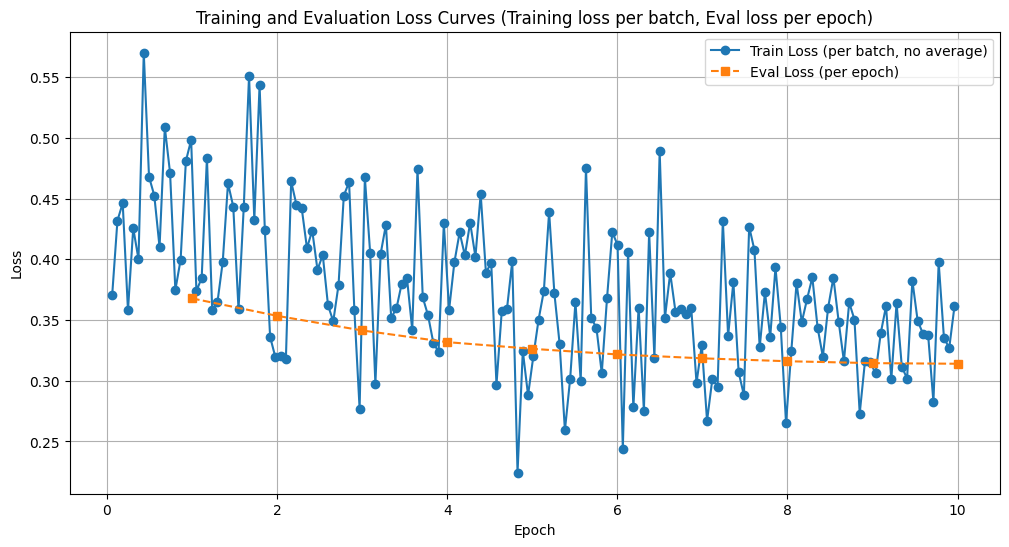

In [38]:
# ✅ BALANCED (337 per class)
balanced_df = (
    df.groupby("type")
    .apply(lambda x: x.sample(n=337) if len(x) >= 337 else x)
    .reset_index(drop=True)
)
train_df_balanced, val_df_balanced = train_test_split(balanced_df, test_size=0.2, stratify=balanced_df["type"])
trainer_3 = run_exp_2(train_df_balanced, val_df_balanced, model, tokenizer, experiment_name="balanced")

In [39]:
# Evaluate on validation set
metrics_val = evaluate_model_on(val_df, trainer_3.model, tokenizer, compute_metrics)
metrics_val

Generating predictions: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 203/203 [02:01<00:00,  1.67it/s]


📊 Manual Evaluation Metrics: {'rougeL': np.float64(0.3601647384919824), 'exact_match': np.float64(0.0)}


{'rougeL': np.float64(0.3601647384919824), 'exact_match': np.float64(0.0)}

/scratch/upftfg14/elsar/342833/ipykernel_5412/4200738239.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=337) if len(x) >= 337 else x)
/scratch/upftfg14/elsar/342833/ipykernel_5412/1286588526.py:29: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Detected kernel version 4.18.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


🔬 Running experiment: balanced


/data/upftfg14/elsar/.conda/envs/elsa_cuda/lib/python3.10/site-packages/transformers/data/data_collator.py:741: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1729647327489/work/torch/csrc/utils/tensor_new.cpp:278.)
  batch["labels"] = torch.tensor(batch["labels"], dtype=torch.int64)
Passing a tuple of `past_key_values` is deprecated and will be removed in Transformers v4.48.0. You should pass an instance of `EncoderDecoderCache` instead, e.g. `past_key_values=EncoderDecoderCache.from_legacy_cache(past_key_values)`.


Epoch,Training Loss,Validation Loss
1,0.996300,0.868670
2,0.843100,0.727970
3,0.731300,0.651433
4,0.661000,0.603360
5,0.622000,0.570364
6,0.570600,0.547378
7,0.599500,0.528662
8,0.579000,0.514265
9,0.564500,0.502460
10,0.540100,0.492999


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


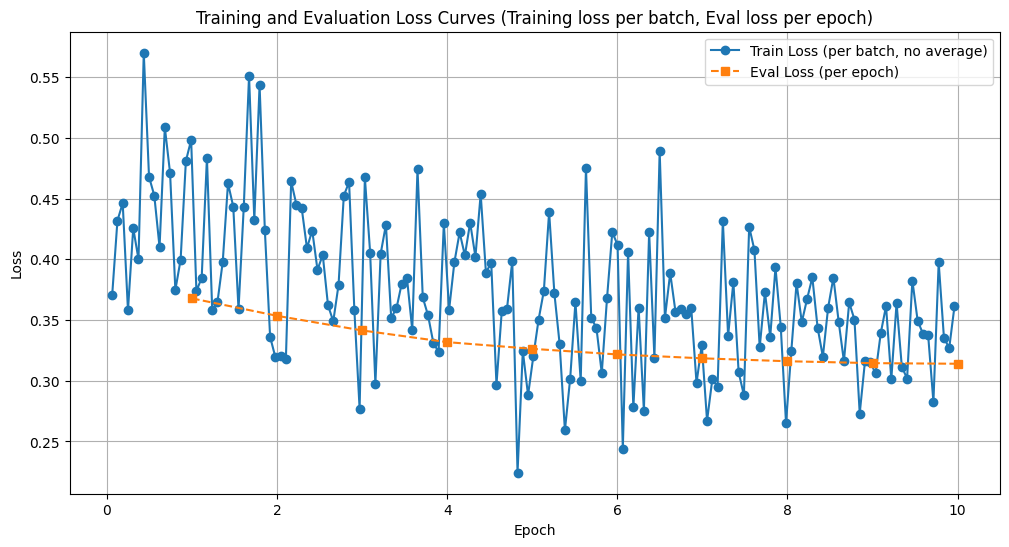

In [15]:
# ✅ BALANCED (337 per class)
balanced_df = (
    df.groupby("type")
    .apply(lambda x: x.sample(n=337) if len(x) >= 337 else x)
    .reset_index(drop=True)
)
train_df_balanced, val_df_balanced = train_test_split(balanced_df, test_size=0.2, stratify=balanced_df["type"])
trainer_4 = run_exp_2(train_df_balanced, val_df_balanced, model, tokenizer, experiment_name="balanced", batch_size=8)

In [30]:

# Evaluate on validation set
metrics_val = evaluate_model_on(val_df_balanced, trainer_4.model, tokenizer, compute_metrics)
metrics_val

Generating predictions: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 203/203 [01:45<00:00,  1.92it/s]


📊 Manual Evaluation Metrics: {'rougeL': np.float64(0.3318942122993534), 'exact_match': np.float64(0.0)}


{'rougeL': np.float64(0.3318942122993534), 'exact_match': np.float64(0.0)}

**Experiment 3: Hyperparameters LR**

/scratch/upftfg14/elsar/342833/ipykernel_5412/1286588526.py:29: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


🔬 Running experiment: exp_bs4_lr3e-05


Epoch,Training Loss,Validation Loss
1,0.350300,0.366614
2,0.377400,0.362259
3,0.344400,0.359244
4,0.352800,0.356229
5,0.356400,0.353084
6,0.345000,0.351090
7,0.357200,0.348233
8,0.392100,0.346481
9,0.338200,0.344715
10,0.357000,0.342501


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


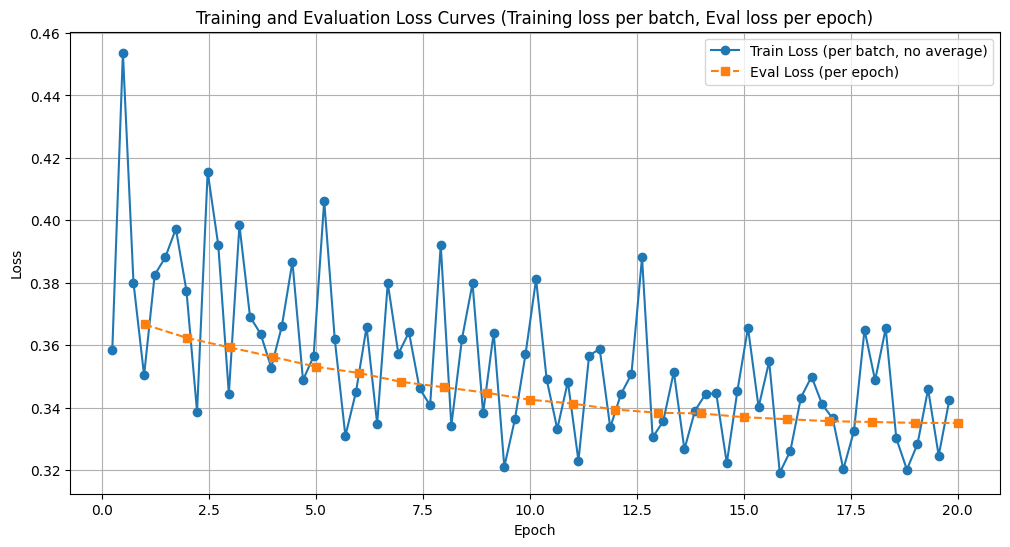

Generating predictions: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 203/203 [01:45<00:00,  1.93it/s]
/scratch/upftfg14/elsar/342833/ipykernel_5412/1286588526.py:29: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


📊 Manual Evaluation Metrics: {'rougeL': np.float64(0.3448213842456246), 'exact_match': np.float64(0.0)}
Metrics for batch size 4 and learning rate 3e-05: {'rougeL': np.float64(0.3448213842456246), 'exact_match': np.float64(0.0)}
🔬 Running experiment: exp_bs4_lr5e-05


Epoch,Training Loss,Validation Loss
1,0.297700,0.332160
2,0.321900,0.327849
3,0.292100,0.324468
4,0.298800,0.321346
5,0.299500,0.319307
6,0.291200,0.317180
7,0.301100,0.314222
8,0.333400,0.312971
9,0.284600,0.311322
10,0.300100,0.309500


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


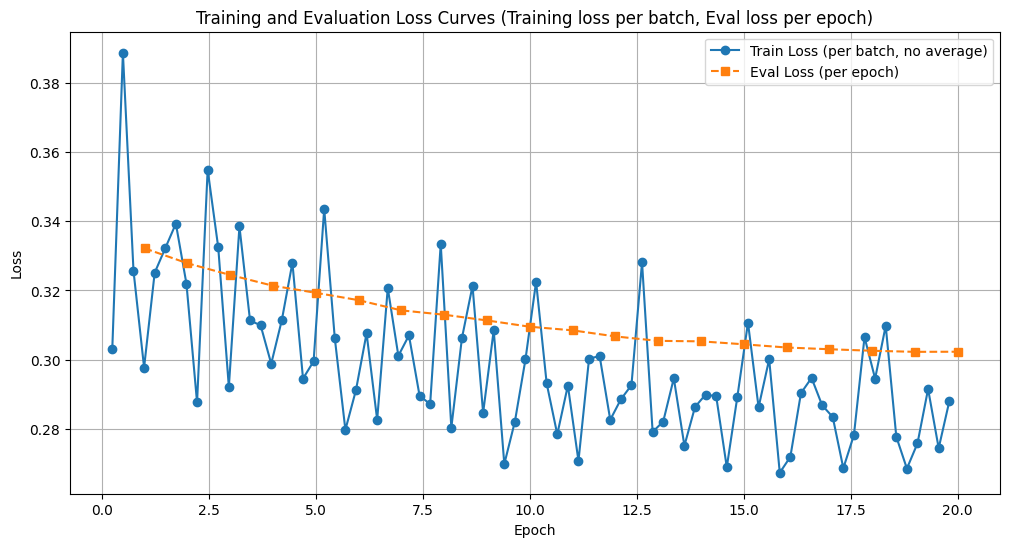

Generating predictions: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 203/203 [01:47<00:00,  1.88it/s]
/scratch/upftfg14/elsar/342833/ipykernel_5412/1286588526.py:29: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


📊 Manual Evaluation Metrics: {'rougeL': np.float64(0.30214380996988927), 'exact_match': np.float64(0.0)}
Metrics for batch size 4 and learning rate 5e-05: {'rougeL': np.float64(0.30214380996988927), 'exact_match': np.float64(0.0)}
🔬 Running experiment: exp_bs4_lr0.0001


Epoch,Training Loss,Validation Loss
1,0.242200,0.302668
2,0.263000,0.296384
3,0.235400,0.293884
4,0.240800,0.291262
5,0.238100,0.289612
6,0.231600,0.287865
7,0.239000,0.285510
8,0.266500,0.284443
9,0.224500,0.282466
10,0.236300,0.281498


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


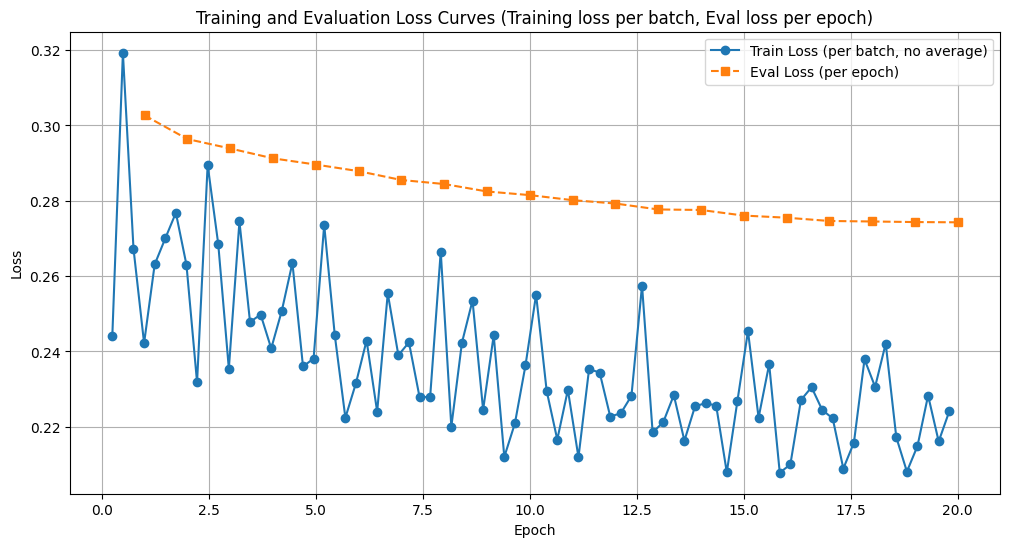

Generating predictions: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 203/203 [01:49<00:00,  1.85it/s]
/scratch/upftfg14/elsar/342833/ipykernel_5412/1286588526.py:29: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


📊 Manual Evaluation Metrics: {'rougeL': np.float64(0.4027956145507644), 'exact_match': np.float64(0.0049261083743842365)}
Metrics for batch size 4 and learning rate 0.0001: {'rougeL': np.float64(0.4027956145507644), 'exact_match': np.float64(0.0049261083743842365)}
🔬 Running experiment: exp_bs8_lr3e-05


Epoch,Training Loss,Validation Loss
1,0.208400,0.274358
2,0.222700,0.274649
3,0.214500,0.274157
4,0.212100,0.273381
5,0.208800,0.272686
6,0.199200,0.273191
7,0.222000,0.273044


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


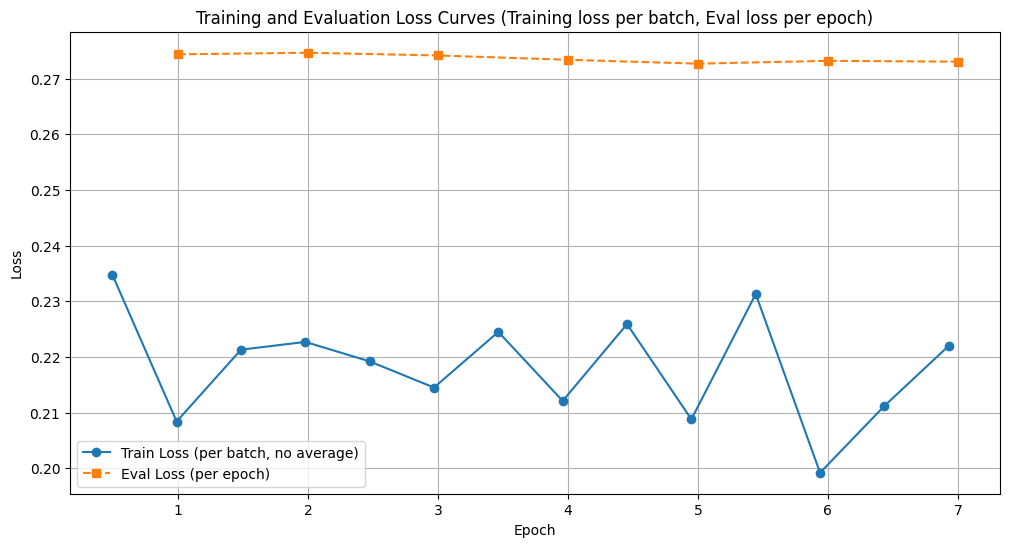

Generating predictions: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 203/203 [01:49<00:00,  1.85it/s]
/scratch/upftfg14/elsar/342833/ipykernel_5412/1286588526.py:29: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


📊 Manual Evaluation Metrics: {'rougeL': np.float64(0.3979701884305616), 'exact_match': np.float64(0.0)}
Metrics for batch size 8 and learning rate 3e-05: {'rougeL': np.float64(0.3979701884305616), 'exact_match': np.float64(0.0)}
🔬 Running experiment: exp_bs8_lr5e-05


Epoch,Training Loss,Validation Loss
1,0.197400,0.275321
2,0.210700,0.275389
3,0.202700,0.274422
4,0.200600,0.273277
5,0.197800,0.272183
6,0.193300,0.271661
7,0.214600,0.271214
8,0.218500,0.269594
9,0.208900,0.270047
10,0.202000,0.270104


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


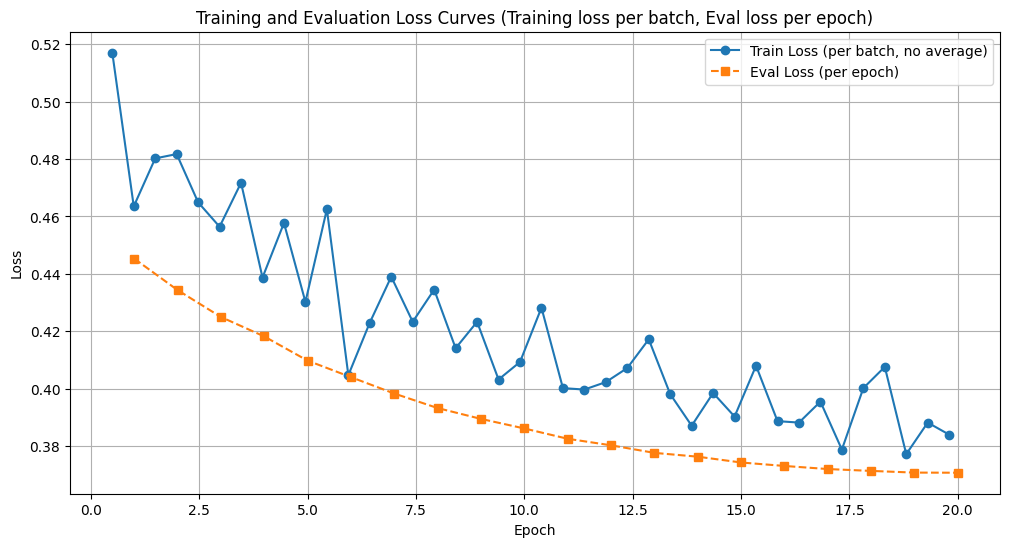

Generating predictions: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 203/203 [01:41<00:00,  2.00it/s]
/scratch/upftfg14/elsar/342833/ipykernel_5412/1286588526.py:29: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


📊 Manual Evaluation Metrics: {'rougeL': np.float64(0.40721206387679265), 'exact_match': np.float64(0.0)}
Metrics for batch size 8 and learning rate 5e-05: {'rougeL': np.float64(0.40721206387679265), 'exact_match': np.float64(0.0)}
🔬 Running experiment: exp_bs8_lr0.0001


Epoch,Training Loss,Validation Loss
1,0.179800,0.276715
2,0.190800,0.277232
3,0.183100,0.274424
4,0.181100,0.273122
5,0.177600,0.272560
6,0.173500,0.271702
7,0.191800,0.271336
8,0.196200,0.269056
9,0.192400,0.267406
10,0.185400,0.267329


There were missing keys in the checkpoint model loaded: ['encoder.embed_tokens.weight', 'decoder.embed_tokens.weight', 'lm_head.weight'].


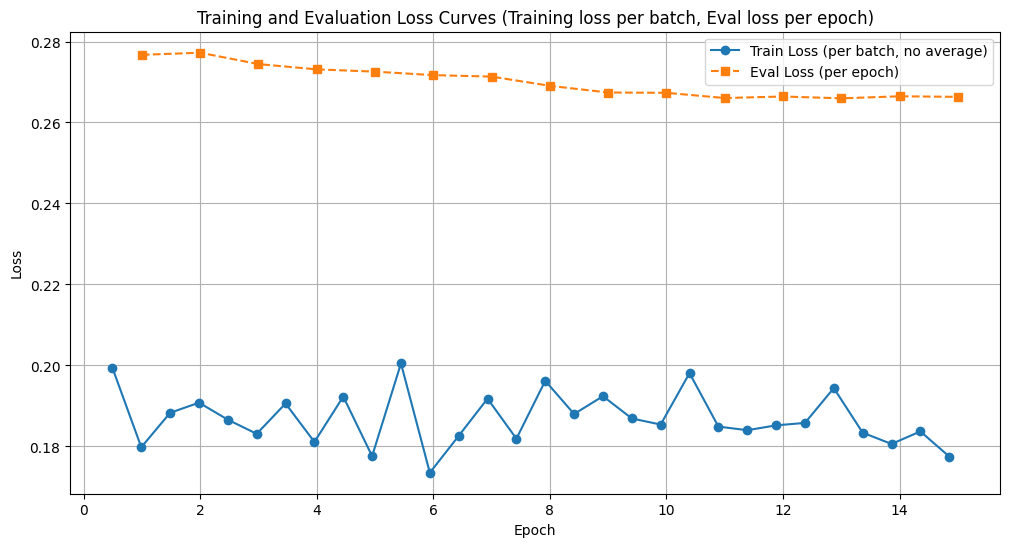

Generating predictions: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 203/203 [01:42<00:00,  1.98it/s]


📊 Manual Evaluation Metrics: {'rougeL': np.float64(0.4139678504740384), 'exact_match': np.float64(0.0)}
Metrics for batch size 8 and learning rate 0.0001: {'rougeL': np.float64(0.4139678504740384), 'exact_match': np.float64(0.0)}


In [35]:
from itertools import product

batch_sizes = [4, 8]
learning_rates = [3e-5, 5e-5, 1e-4]  # Optional grid

for bs, lr in product(batch_sizes, learning_rates):
    trainer = run_exp_2(
        train_df_balanced,
        val_df_balanced,
        model,
        tokenizer,
        experiment_name=f"exp_bs{bs}_lr{lr}",
        batch_size=bs, 
        learning_rate=lr
    )
    # Evaluate on validation set
    metrics_val = evaluate_model_on(val_df_balanced, trainer.model, tokenizer, compute_metrics)
    print(f"Metrics for batch size {bs} and learning rate {lr}: {metrics_val}")





FINAL MODEL 

In [5]:
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import torch

# Load model and tokenizer
model_path = "./results/exp_bs4_lr0.0001"
model = AutoModelForSeq2SeqLM.from_pretrained(model_path)
tokenizer = AutoTokenizer.from_pretrained(model_path)

# Ensure model is in eval mode and on correct device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# Sample 2 rows per type
sampled_df = df.groupby("type").apply(lambda x: x.sample(n=2)).reset_index(drop=True)

# Generate predictions
for _, row in sampled_df.iterrows():
    input_text = row["source"]  # Replace with actual input column name
    input_ids = tokenizer.encode(input_text, return_tensors="pt").to(device)

    with torch.no_grad():
        output_ids = model.generate(input_ids, max_new_tokens=100)

    output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)
    print(f"\nType: {row['type']}")
    print(f"Input: {input_text}")
    print(f"Generated: {output_text}")


/scratch/upftfg14/elsar/343032/ipykernel_7635/997459997.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby("type").apply(lambda x: x.sample(n=2)).reset_index(drop=True)
Token indices sequence length is longer than the specified maximum sequence length for this model (2399 > 512). Running this sequence through the model will result in indexing errors



Type: Decomposer
Input: ### Input:
Given a 【Database schema】 description, a knowledge 【Evidence】 and the 【Question】, you need to use valid SQLite and understand the database and knowledge, and then decompose the question into subquestions for text-to-SQL generation.
When generating SQL, we should always consider constraints:
【Constraints】
- In `SELECT <column>`, just select needed columns in the 【Question】 without any unnecessary column or value
- In `FROM <table>` or `JOIN <table>`, do not include unnecessary table
- If use max or min func, `JOIN <table>` FIRST, THEN use `SELECT MAX(<column>)` or `SELECT MIN(<column>)`
- If [Value examples] of <column> has 'None' or None, use `JOIN <table>` or `WHERE <column> is NOT NULL` is better
- If use `ORDER BY <column> ASC|DESC`, add `GROUP BY <column>` before to select distinct values


【Database schema】
# Table: frpm
[
  (CDSCode, CDSCode. Value examples: ['01100170109835', '01100170112607'].),
  (Charter School (Y/N), Charter School (Y/N). 